In [2]:
import json
import openpyxl
from pathlib import Path

In [3]:
# Data source mnmn  

data_path_5 = "./data/20181105/X-ray scoring NZKS OT high fish oil trial Score Data OC171A.xlsx"
data_path_6 = "./data/20181106/X-ray scoring NZKS OT high fish oil trial Score Data OC171D.xlsx"
data_path_7 = "./data/20181107/X-ray scoring NZKS OT high fish oil trial Score Data OC171C3.xlsx"
data_path_8 = "./data/20181108/X-ray scoring NZKS OT high fish oil trial Score Data OC171B.xlsx"

list_path = [data_path_5, data_path_6, data_path_7, data_path_8]

In [4]:
def openx(path):
    wb = openpyxl.load_workbook(path)
    sheet = wb.active
    return sheet

In [5]:
def columelist(sh):
    col_names = []
    for column in sheet.iter_cols(1, sheet.max_column):
        col_names.append(column[0].value)   
    print(col_names)

In [6]:
def extractx(path):
    sh = openx(path)
    data = {}
    data["pen_name"] = list()
    data["pen_id"] = list()
    data["label"] = list()
    for i, row in enumerate(sh.iter_rows(values_only=True)):
        if i <= 3:
            continue
        else:
            if row[1] is None and row[2] is None:
                break
            data["pen_name"].append(row[1])
            data["pen_id"].append(row[2])
            data["label"].append(row[3:19])
    return data
        

In [7]:
# for pa in list_path:
# #     print(pa)
#     data = extractx(pa)
# #     print(data)
#     with open(pa.replace(".xlsx", ".json"), "w") as f:
#         json.dump(data, f)

In [8]:
import cv2
import json
import pickle
import numpy as np
from PIL import Image, ImageOps
from pathlib import Path
from matplotlib import pyplot as plt
from icecream import ic

import torch 
from torch import nn
from torch.utils.data import Dataset, DataLoader

input_size = (4096, 4096)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-2cctc86h because the default path (/home/johnoldman/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [9]:
def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.imshow(img)
    plt.show()



In [10]:
def exbb(image, limit=2000):
    img = np.array(image)

    img = np.ma.masked_outside(img, 70, 220)
#     img = np.ma.masked_outside(img, 200, 255)
    simg = np.sum(img, axis=1)
    cimg = np.count_nonzero(img, axis=1)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('A tale of 2 subplots')

    ax1.plot(cimg)
    ax2.plot(simg)
    plt.show()
    idmax = np.argmax(simg)
    start = 0
    end = len(simg)
    
    for i in range(len(simg)-idmax):
        if cimg[idmax+i] < limit:
            end = idmax + i
            break
    for i in range(idmax):
        if cimg[idmax-i] < limit:
            start = idmax - i
            break
    
    img = img[start:end, :]
            
#     ic(img.shape)
#     ic(start, end)
    return img
    


In [11]:
def vis_class(data_paths):
    data_paths = Path(data_paths)
    data_paths = list(data_paths.iterdir())
    images = dict()
    labels = dict()
    keys = list()
    for datap in data_paths:
        datap = Path(datap)
        json_p = list(datap.glob("*.json"))[0]
        with open(json_p, "r") as f:
            data = json.load(f)
        for i, lab in enumerate(data["label"]):
#             idx = data["label"][i]
            ic(lab)


In [12]:
vis_class("./data")

ic| lab: [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 2, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0]
ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0]
ic| lab: [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1

ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
ic| lab: [1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
ic| lab: [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0]
ic| lab: [0, 1, 3, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0]
ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
ic| lab: [1, 1

ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]
ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1]
ic| lab: [1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
ic| lab: [0,IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
ic| lab: [0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
ic| lab: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
ic| lab: [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2]
ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ic| lab: [0, 1

KeyboardInterrupt: 

In [59]:
def pre_load_and_save_images(data_paths):
    data_paths = Path(data_paths)
    data_paths = list(data_paths.iterdir())
    images = dict()
    labels = dict()
    keys = list()
    for datap in data_paths:
        datap = Path(datap)
        json_p = list(datap.glob("*.json"))[0]
        with open(json_p, "r") as f:
            data = json.load(f)
        for i, name in enumerate(data["pen_name"]):
            idx = data["pen_id"][i]
            image_name = str(idx) + ".jpg"
            imagep = datap.joinpath(image_name)
#             img = cv2.imread(str(imagep), cv2.IMREAD_GRAYSCALE)
            try:
                img = Image.open(str(imagep))
                img = ImageOps.grayscale(img)
            except:
                ic("image error at : ", name, idx)
                continue
            if img is None:
                print("image is None :", imagep)
                continue
#             img = cv2.resize(img, input_size, cv2.INTER_AREA)
#             ic(img)
#             img = img.resize(input_size)
            img = exbb(img)
#             img = np.array(img)
            imshow(img)
            
            key_name = name + "_" + str(idx)
            label_tmp = data["label"][i]
            images[key_name] = img
            labels[key_name] = label_tmp
            keys.append(key_name)
#             print(key_name)
#             break
    return {"images" : images, "labels" : labels, "keys" : keys}


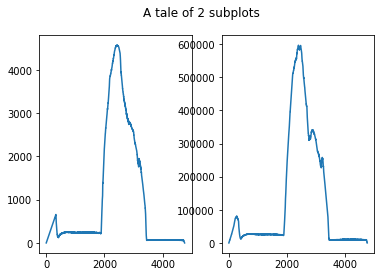

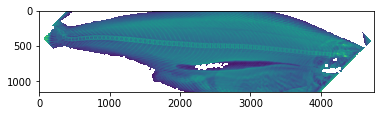

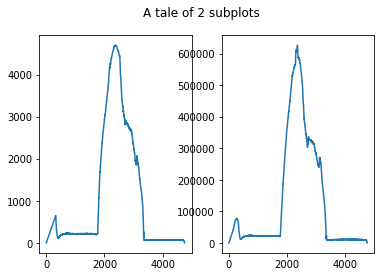

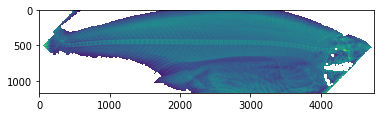

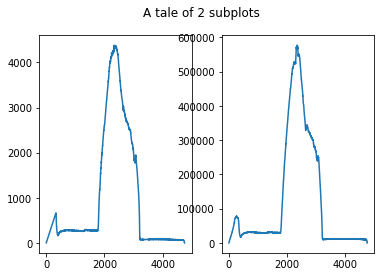

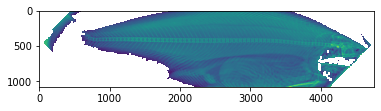

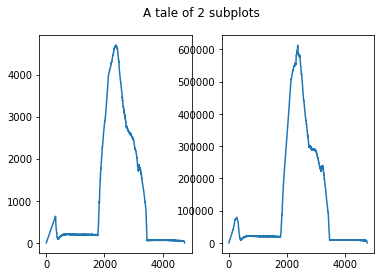

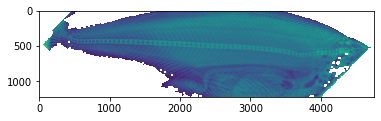

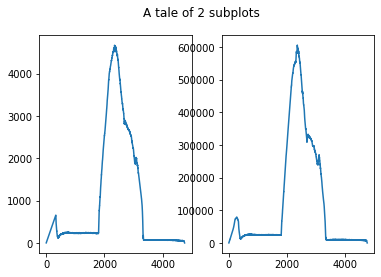

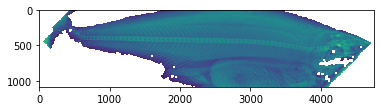

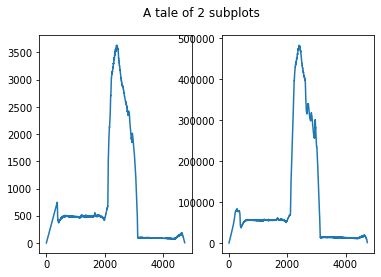

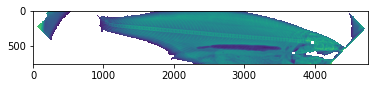

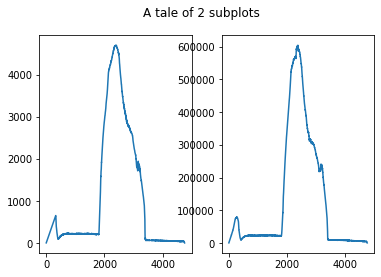

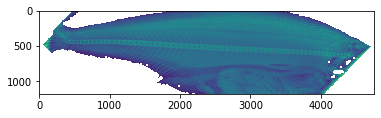

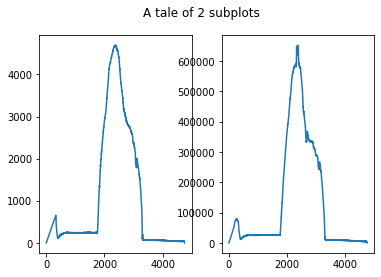

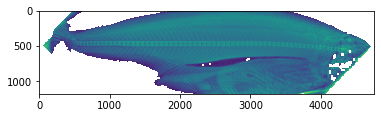

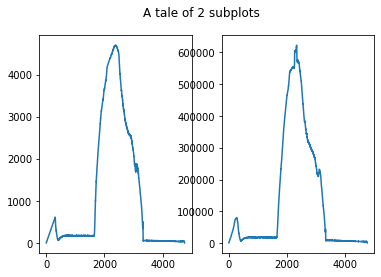

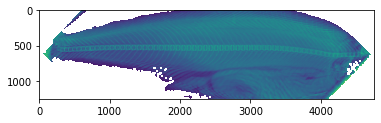

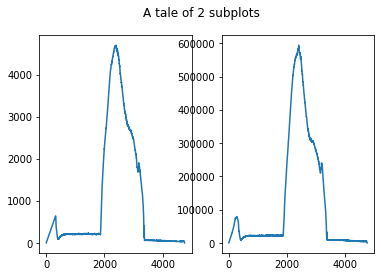

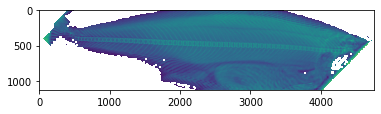

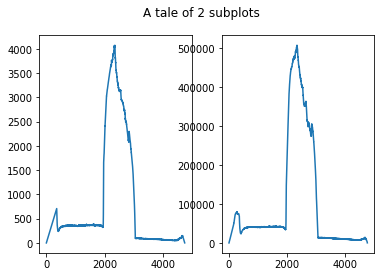

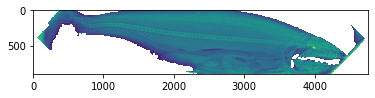

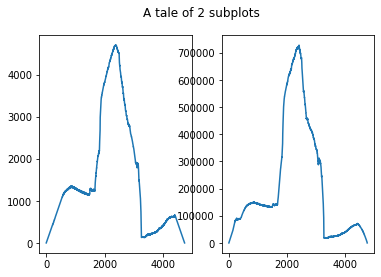

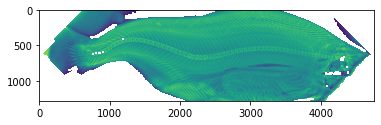

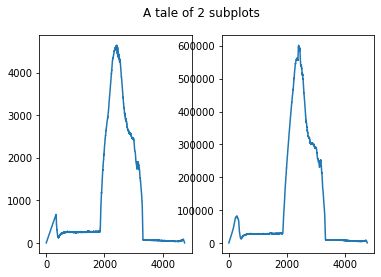

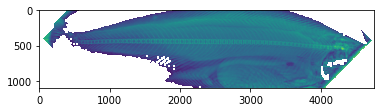

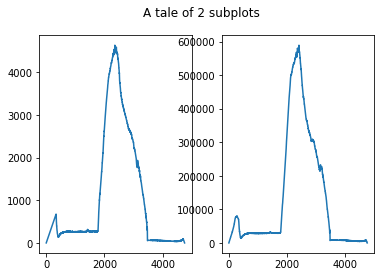

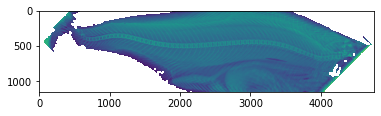

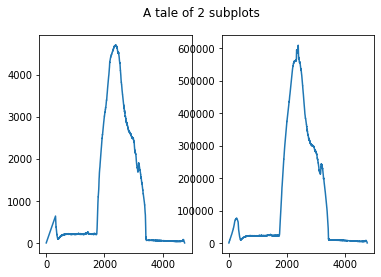

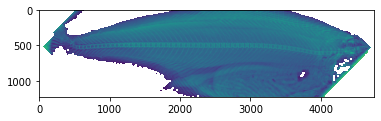

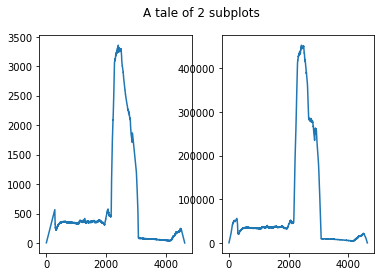

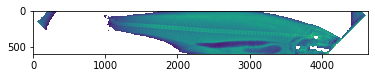

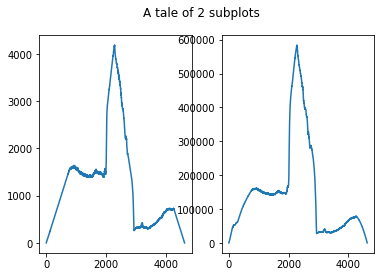

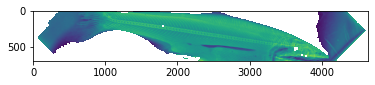

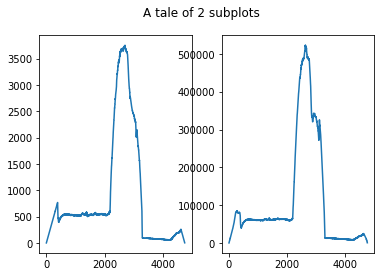

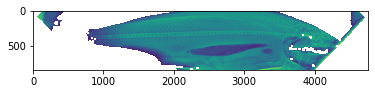

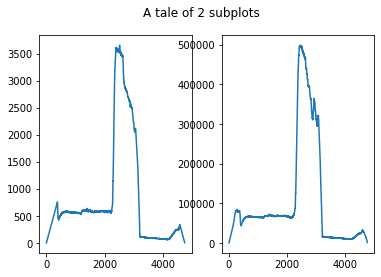

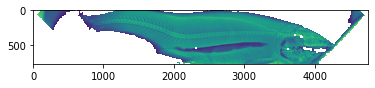

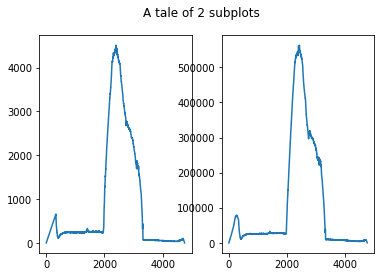

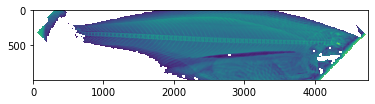

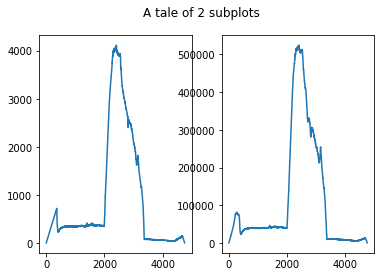

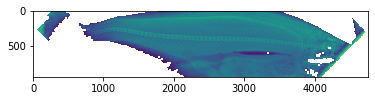

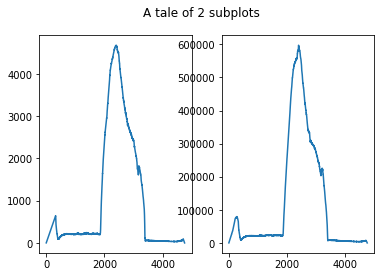

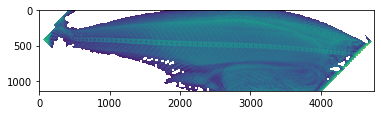

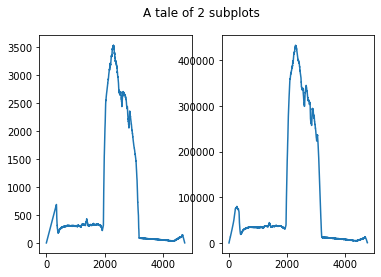

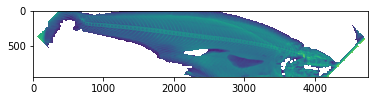

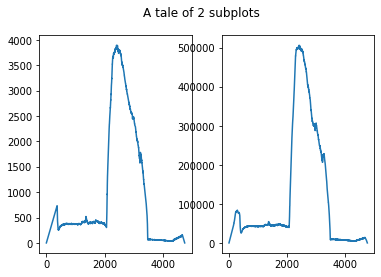

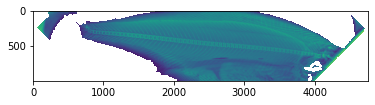

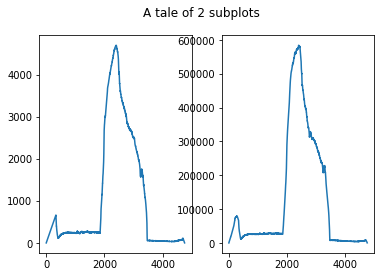

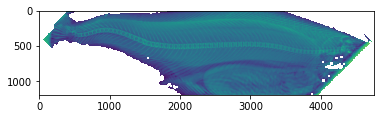

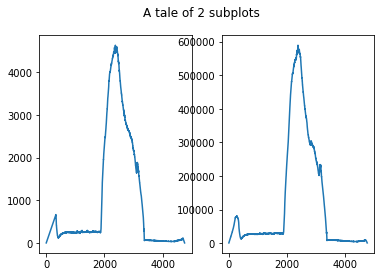

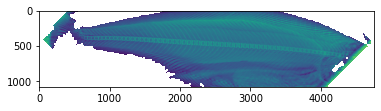

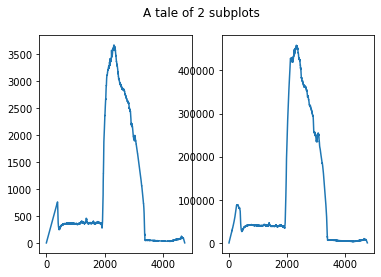

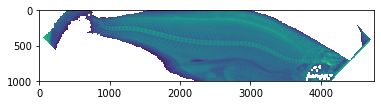

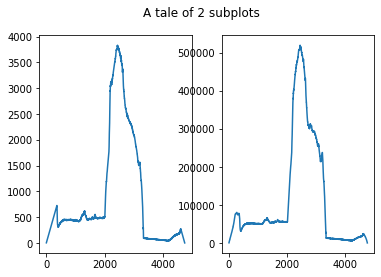

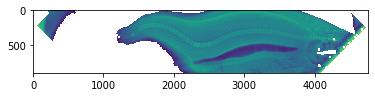

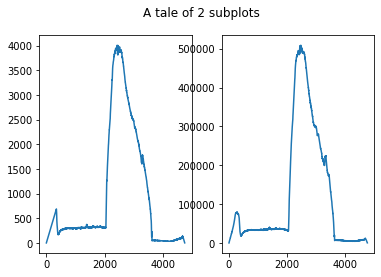

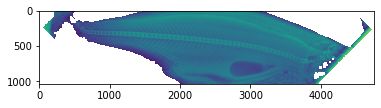

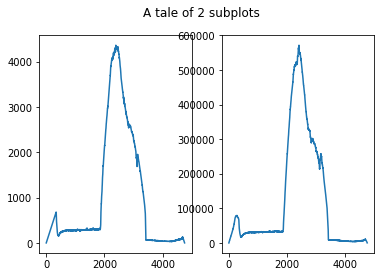

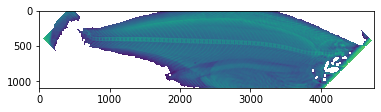

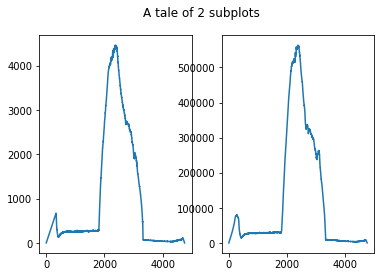

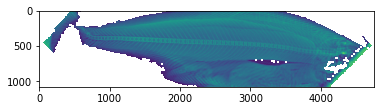

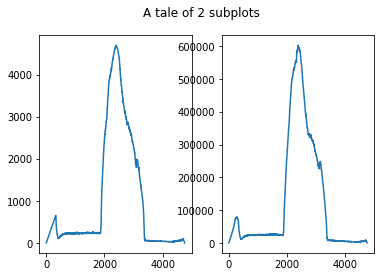

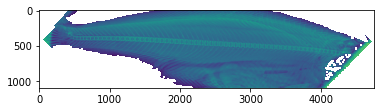

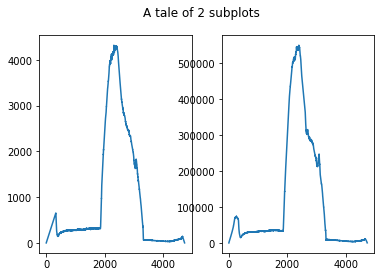

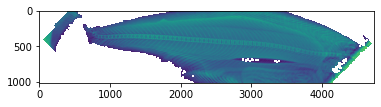

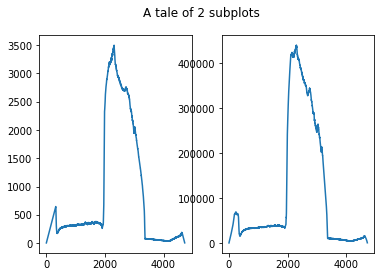

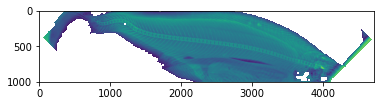

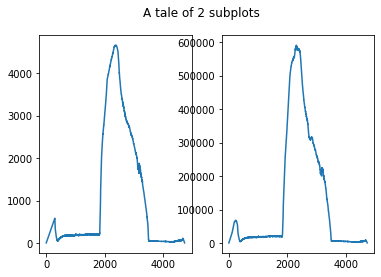

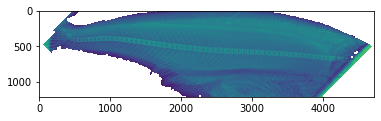

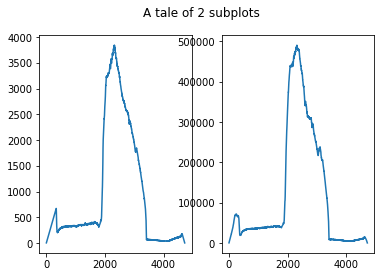

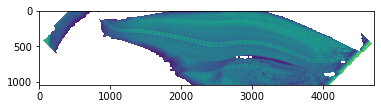

ic| 'image error at : ', name: 'OC171B', idx: 37


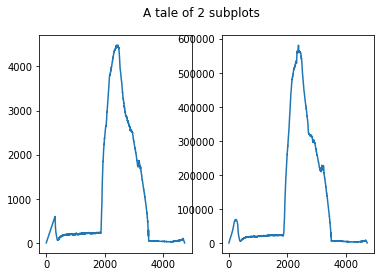

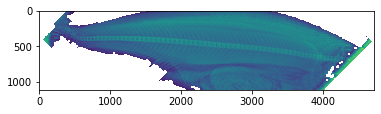

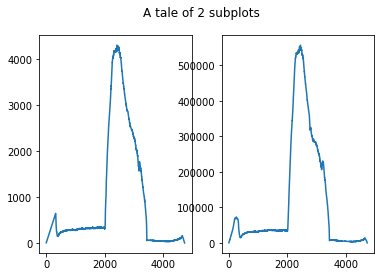

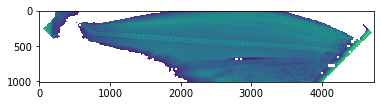

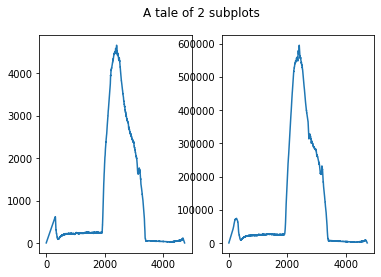

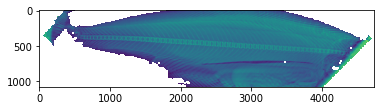

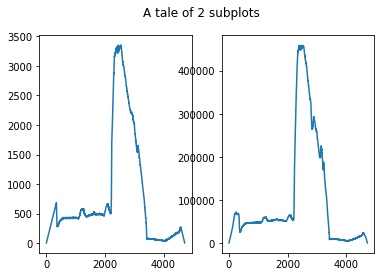

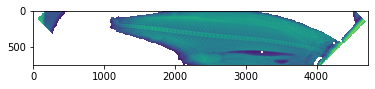

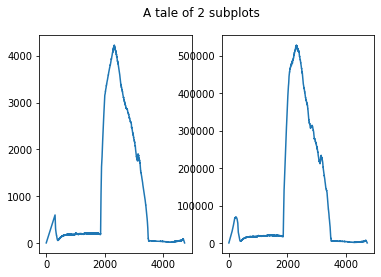

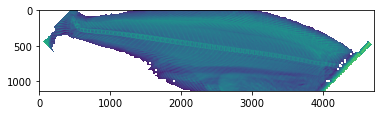

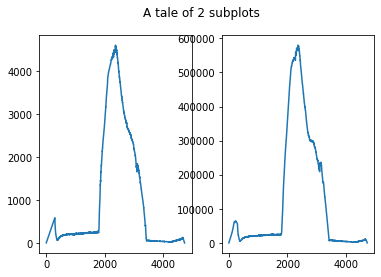

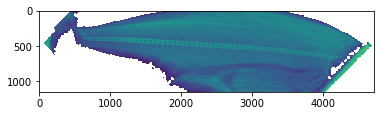

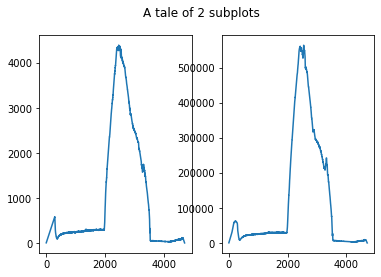

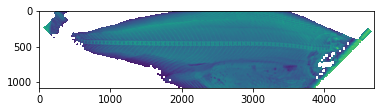

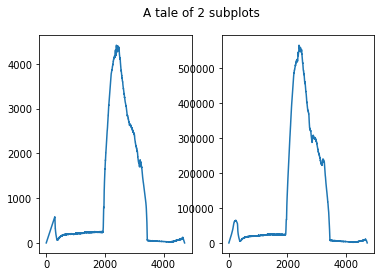

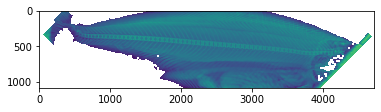

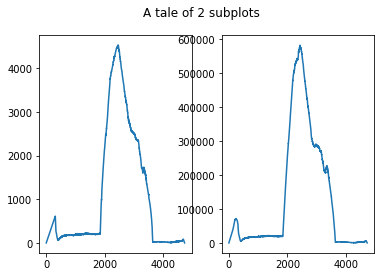

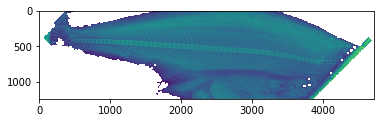

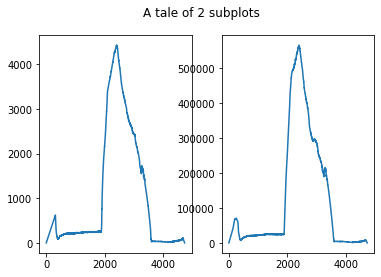

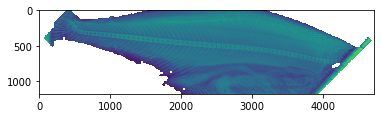

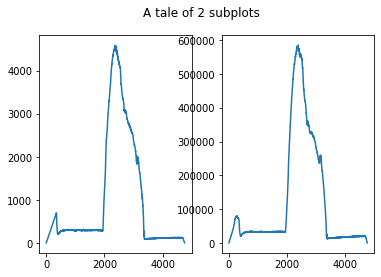

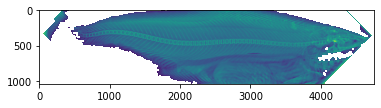

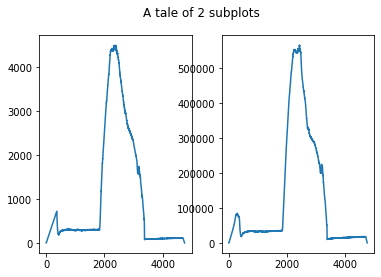

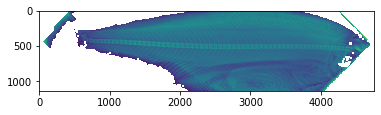

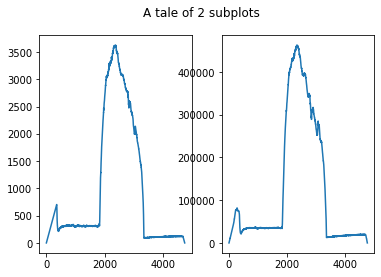

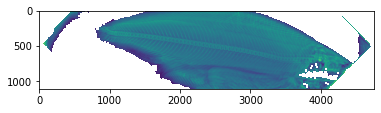

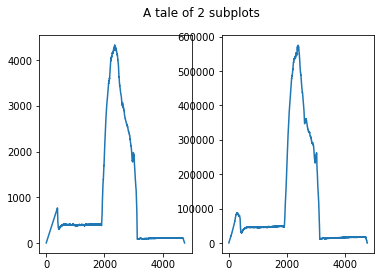

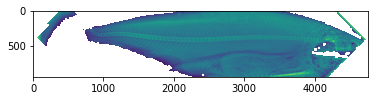

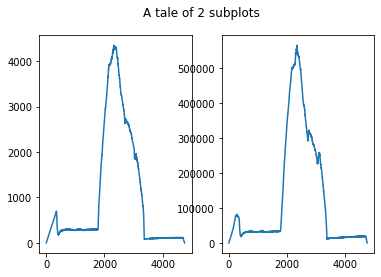

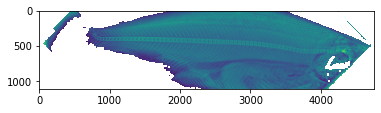

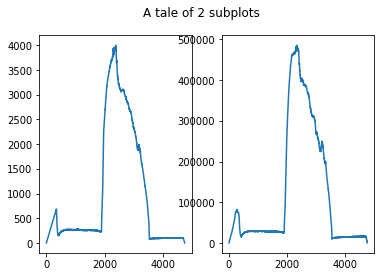

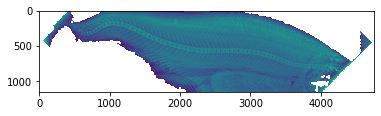

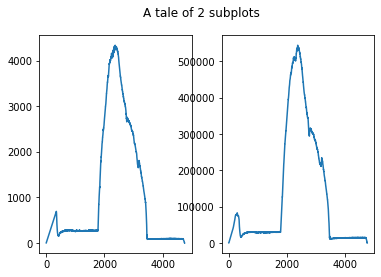

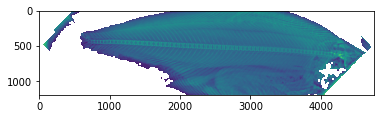

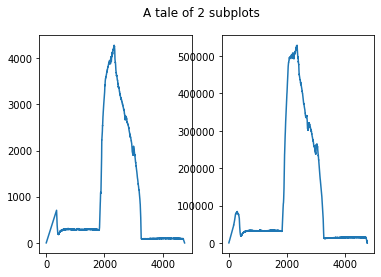

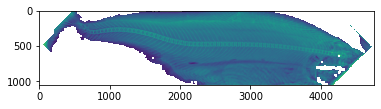

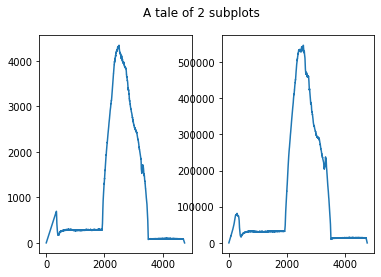

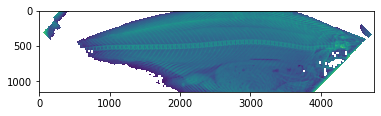

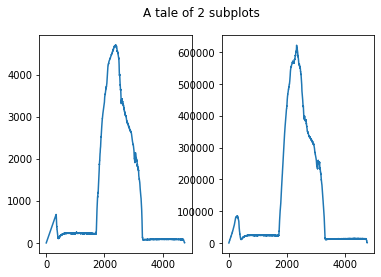

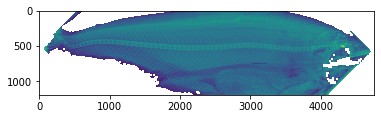

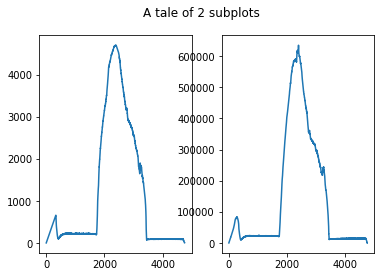

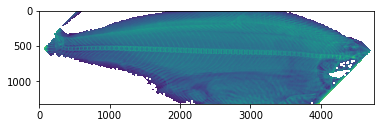

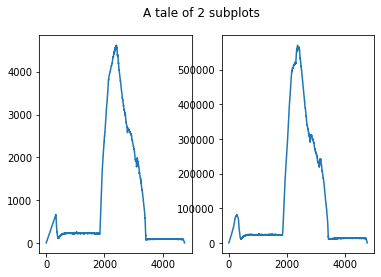

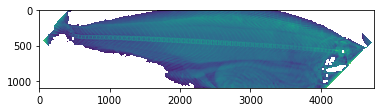

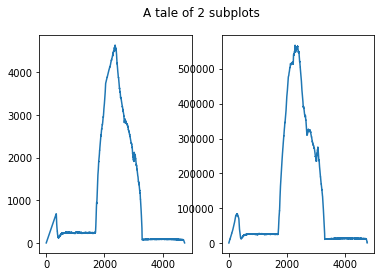

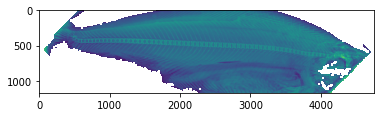

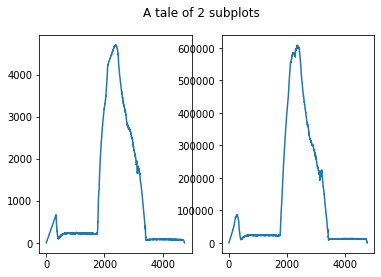

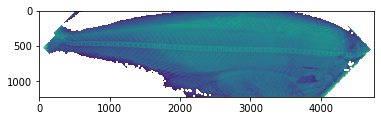

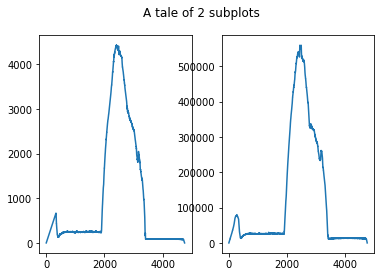

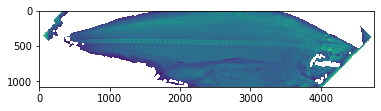

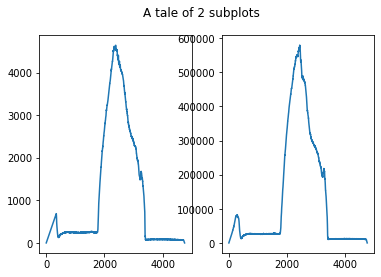

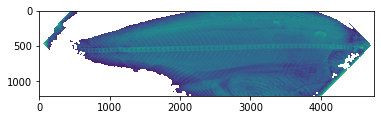

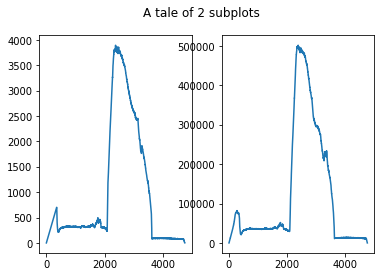

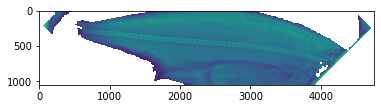

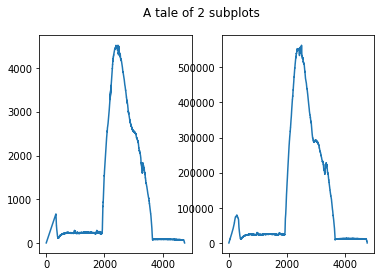

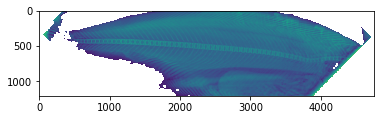

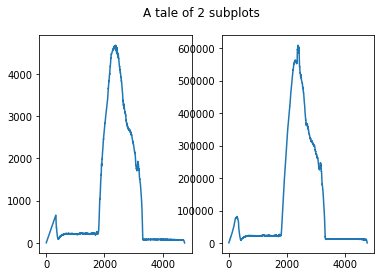

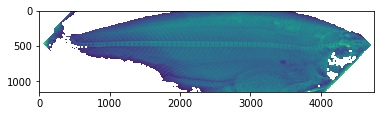

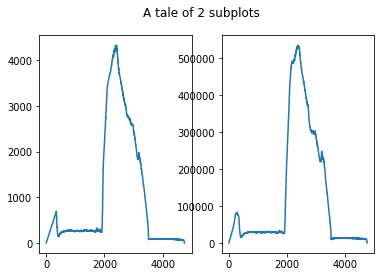

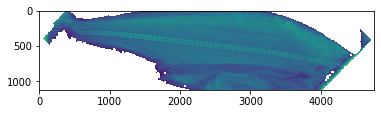

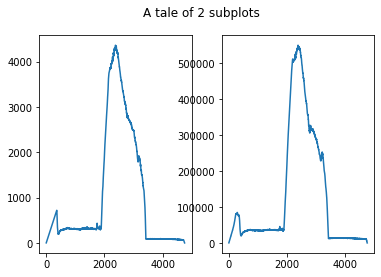

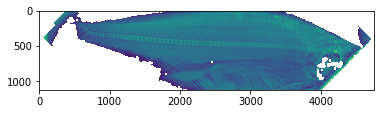

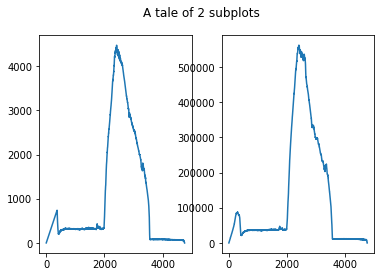

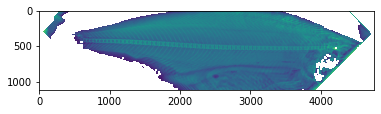

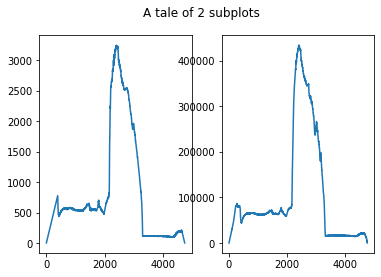

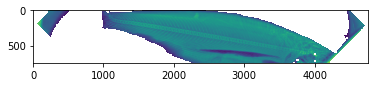

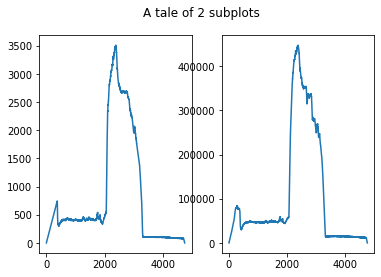

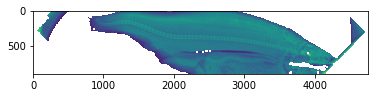

In [ ]:
# dataset = SalmonDataset("./data")
dataset = pre_load_and_save_images("./data")
# with open("pre_load_bb.pk", "wb") as f:
#     pickle.dump(dataset, f, protocol=pickle.HIGHEST_PROTOCOL)